Implement Random Forest
<br>
Implement Ensemble learning for any 3 classifiers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Simple data preparation
# Prepare features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data prepared successfully!")

Training set: (614, 8)
Test set: (154, 8)
Data prepared successfully!


In [4]:
# 3 Classifiers: Random Forest, AdaBoost (boosting), Bagging (bootstrap)
print("THREE ENSEMBLE MODELS: RandomForest, AdaBoost, Bagging")
# 1. Random Forest (all default parameters shown)
rf = RandomForestClassifier(
    n_estimators=100,              # Number of trees in the forest (default)
    criterion='gini',              # Function to measure quality of split (default)
    max_depth=None,                # Maximum depth of the tree (default)
    min_samples_split=2,           # Minimum samples required to split node (default)
    min_samples_leaf=1,            # Minimum samples required at leaf node (default)
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction at leaf (default)
    max_features='sqrt',           # Number of features for best split (default)
    max_leaf_nodes=None,           # Maximum leaf nodes (default)
    min_impurity_decrease=0.0,     # Minimum impurity decrease for split (default)
    bootstrap=True,                # Bootstrap samples when building trees (default)
    oob_score=False,               # Use out-of-bag samples for score (default)
    n_jobs=None,                   # Number of jobs for parallel computation (default)
    random_state=42,               # Random seed for reproducibility
    verbose=0,                     # Verbosity level (default)
    warm_start=False,              # Reuse solution of previous call (default)
    class_weight=None,             # Weights associated with classes (default)
    ccp_alpha=0.0,                 # Complexity parameter for pruning (default)
    max_samples=None               # Number of samples to draw (default)
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 2. AdaBoost (all default parameters shown)
ada = AdaBoostClassifier(
    estimator=None,                # The base estimator from which the boosted ensemble is built (default)
    n_estimators=50,               # Number of weak learners (default)
    learning_rate=1.0,             # Weight applied to each classifier at each boosting iteration (default)
    algorithm='SAMME',             # If ‘SAMME’ then use the SAMME real boosting algorithm (default)
    random_state=42                # Random seed for reproducibility
)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

# 3. BaggingClassifier (all default parameters shown)
bag = BaggingClassifier(
    estimator=None,                # The base estimator to fit on random subsets of the dataset (default)
    n_estimators=10,               # Number of base estimators (default)
    max_samples=1.0,               # Max samples to draw from X to train each base estimator (default)
    max_features=1.0,              # Max features to draw from X to train each base estimator (default)
    bootstrap=True,                # Whether samples are drawn with replacement (default)
    bootstrap_features=False,      # Whether features are drawn with replacement (default)
    oob_score=False,               # Whether to use out-of-bag samples to estimate the generalization error (default)
    warm_start=False,              # Whether to reuse the solution of the previous call to fit (default)
    n_jobs=None,                   # Number of jobs to run in parallel (default)
    random_state=42,               # Random seed for reproducibility
    verbose=0                      # Controls the verbosity when fitting and predicting (default)
)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_accuracy = accuracy_score(y_test, bag_pred)
print(f"Bagging (Bootstrap) Accuracy: {bag_accuracy:.4f}")

THREE ENSEMBLE MODELS: RandomForest, AdaBoost, Bagging
Random Forest Accuracy: 0.7208


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Accuracy: 0.7792
Bagging (Bootstrap) Accuracy: 0.7013


In [5]:
# Performance Comparison
print("\nPERFORMANCE COMPARISON")

models_data = []

# Random Forest metrics
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
models_data.append({
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
})

# AdaBoost metrics
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
models_data.append({
    'Model': 'AdaBoost',
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1
})

# Bagging metrics
bag_precision = precision_score(y_test, bag_pred)
bag_recall = recall_score(y_test, bag_pred)
bag_f1 = f1_score(y_test, bag_pred)
models_data.append({
    'Model': 'Bagging (Bootstrap)',
    'Accuracy': bag_accuracy,
    'Precision': bag_precision,
    'Recall': bag_recall,
    'F1-Score': bag_f1
})

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_data)

print("\nPerformance Metrics:")
print(comparison_df.round(4).to_string(index=False))


PERFORMANCE COMPARISON

Performance Metrics:
              Model  Accuracy  Precision  Recall  F1-Score
      Random Forest    0.7208     0.6071  0.6182    0.6126
           AdaBoost    0.7792     0.6780  0.7273    0.7018
Bagging (Bootstrap)    0.7013     0.5818  0.5818    0.5818


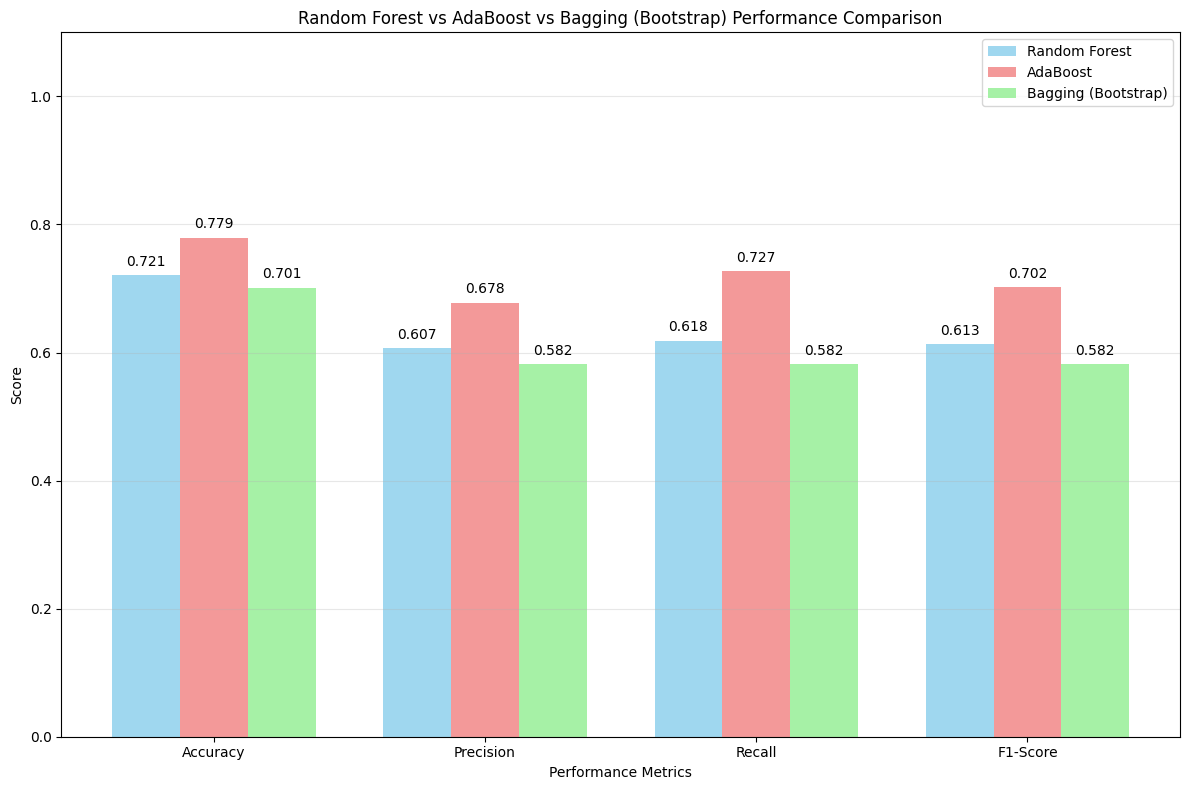

In [6]:
# Performance Visualization
plt.figure(figsize=(12, 8))

models = comparison_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen']

x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models):
    values = [comparison_df.iloc[i][metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model, color=colors[i], alpha=0.8)
    for j, v in enumerate(values):
        plt.text(x[j] + i*width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Random Forest vs AdaBoost vs Bagging (Bootstrap) Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Inference

After evaluating Random Forest, AdaBoost, and Bagging (bootstrap) on the diabetes dataset:

- Random Forest provides robust predictions by averaging many decision trees and typically reduces variance.
- AdaBoost (boosting) focuses on hard examples and often improves recall and F1 by combining weak learners.
- Bagging (bootstrap) reduces variance by training base estimators on bootstrap samples and aggregating their predictions.

Boosting is by far the best model for this dataset